In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("../DATA/airline_tweets.csv")

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: xlabel='airline_sentiment', ylabel='count'>

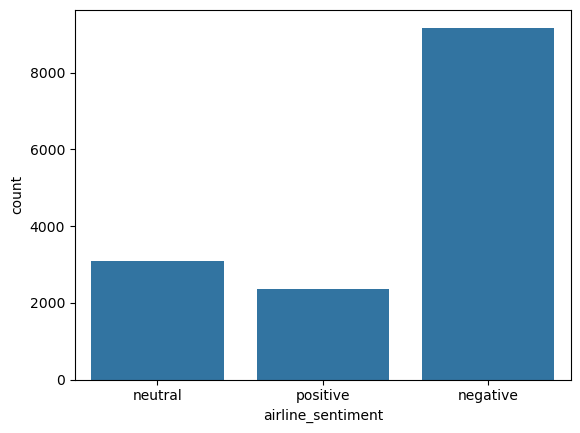

In [ ]:

sns.countplot(data=df,x='airline_sentiment')

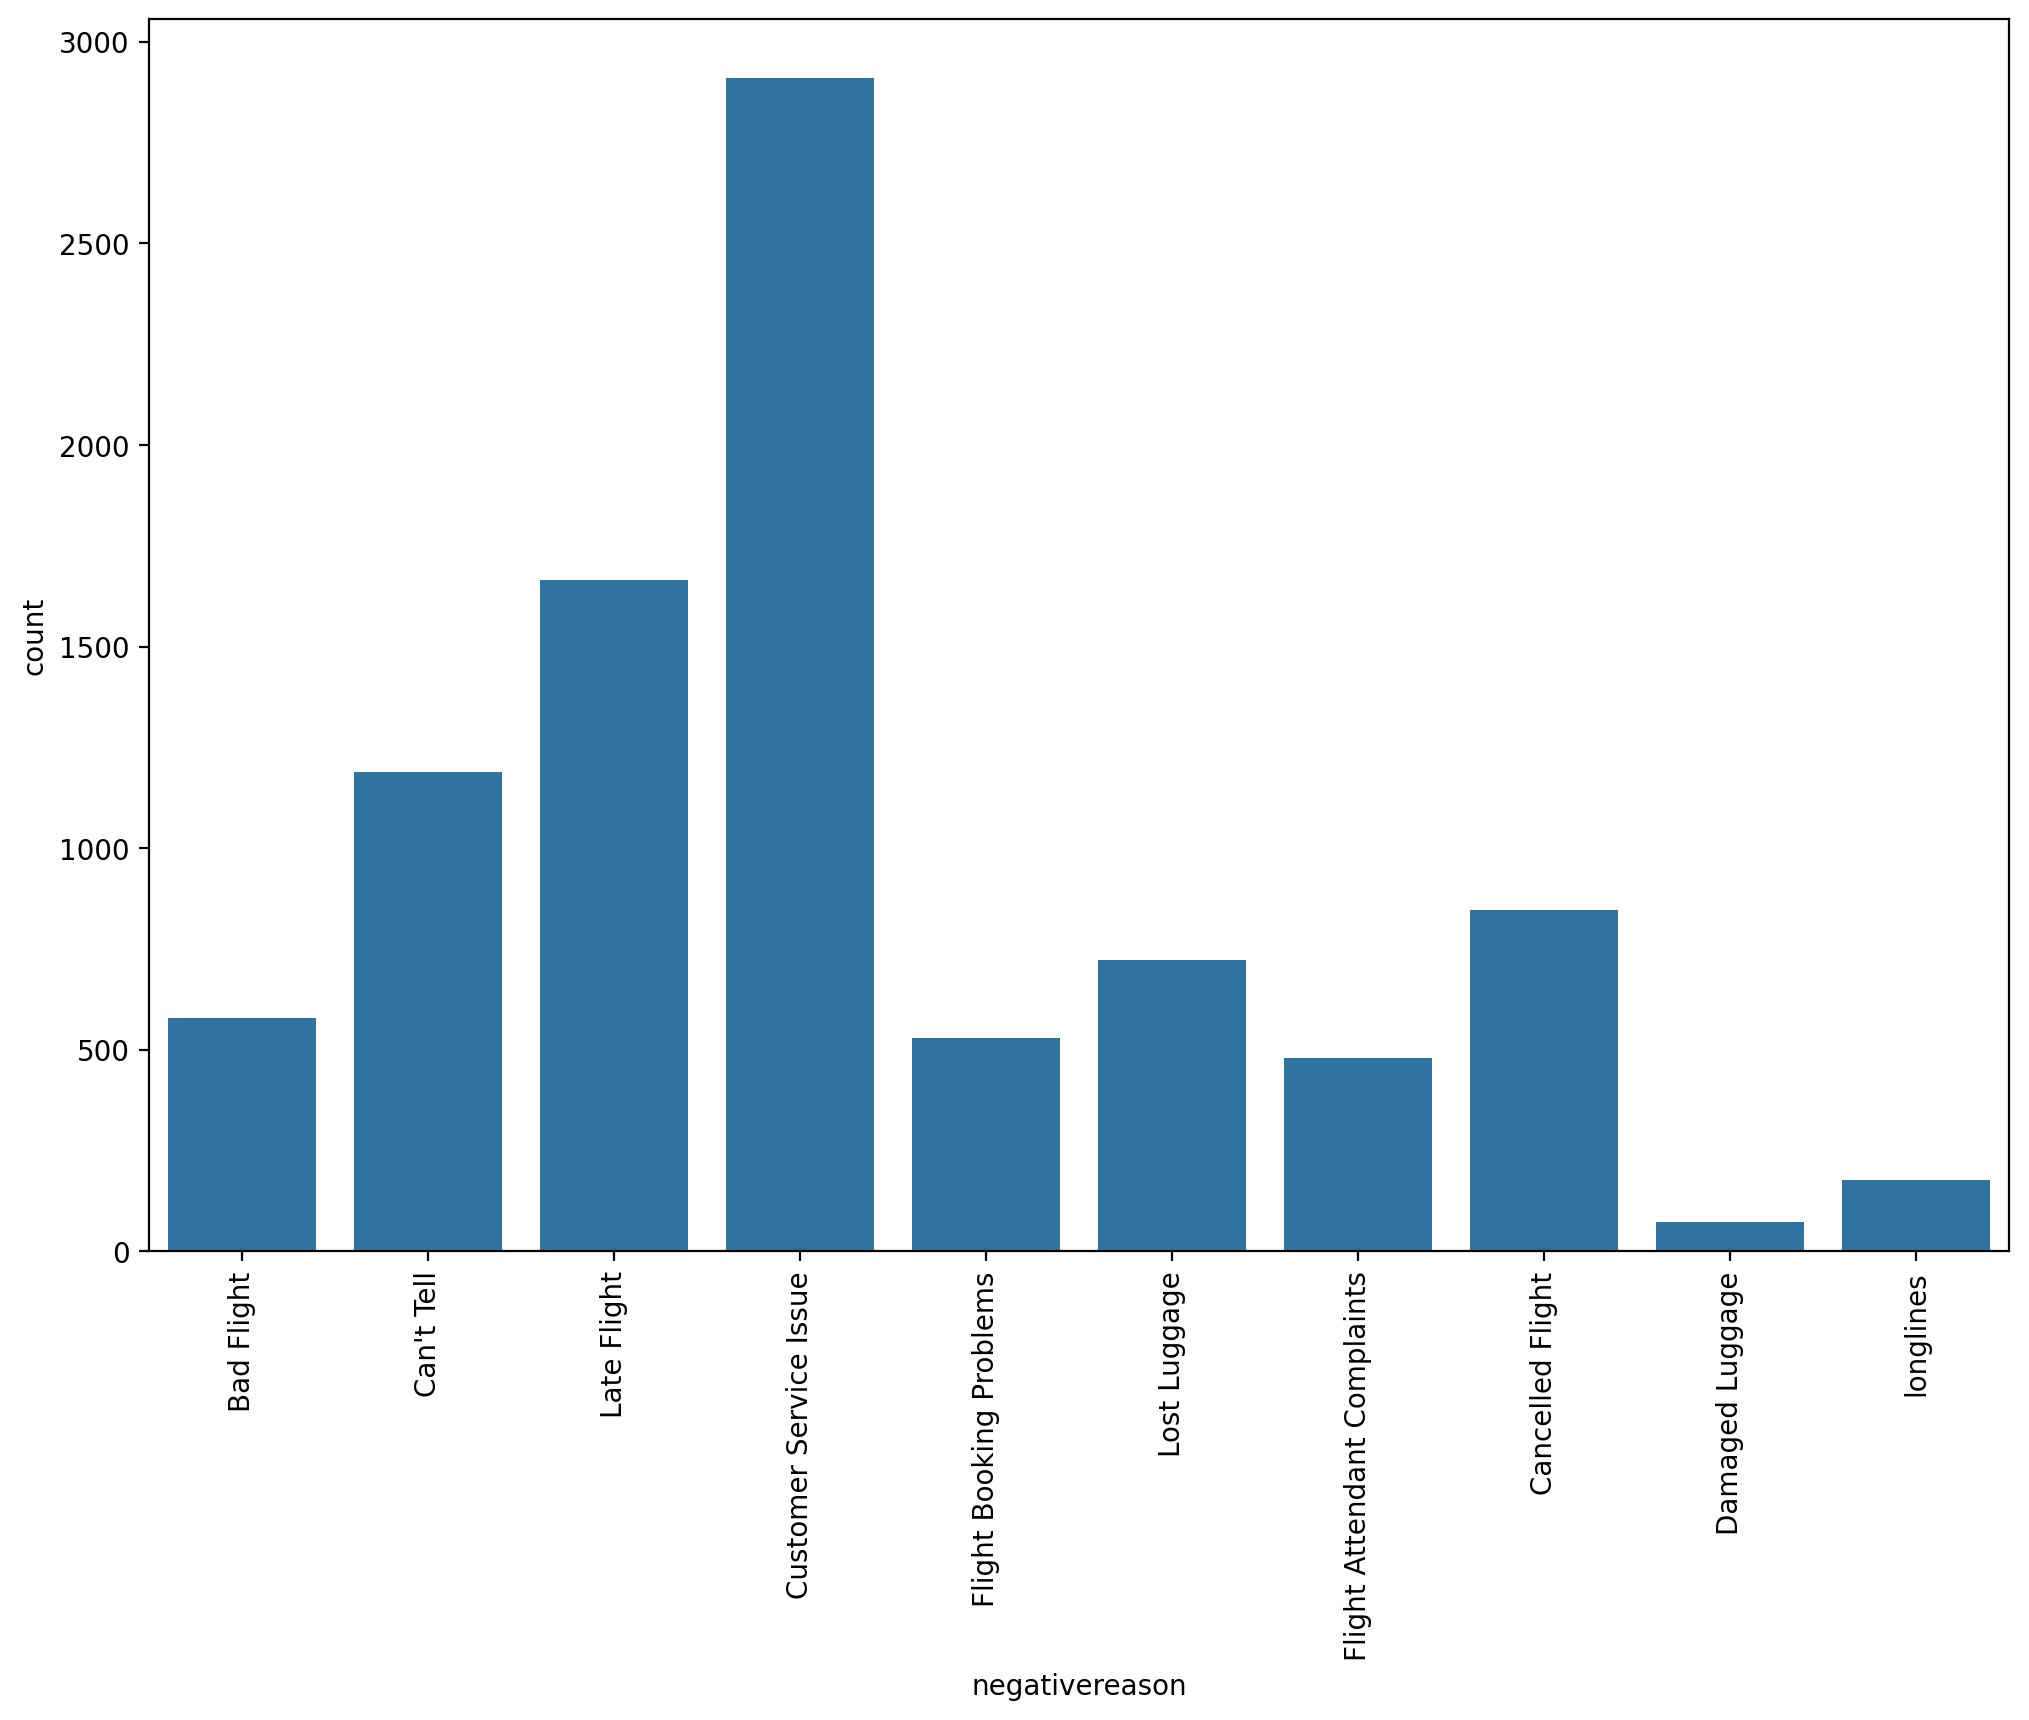

In [8]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(data=df,x='negativereason')
plt.xticks(rotation=90);

<Axes: xlabel='airline', ylabel='count'>

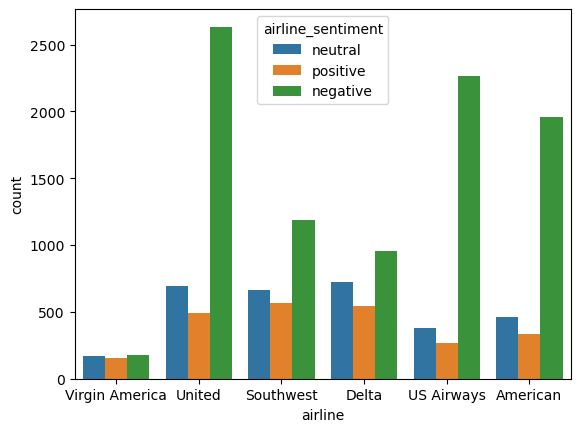

In [9]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

In [10]:
data=df[['airline_sentiment','text']]

In [11]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [12]:
X=df['text']

In [13]:
y=df['airline_sentiment']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfid=TfidfVectorizer(stop_words='english')

In [18]:
X_train_tfid=tfid.fit_transform(X_train)

In [19]:
X_test_tfid=tfid.transform(X_test)

In [20]:
X_train_tfid

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

Compare Reason of the Model

Building Model

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
nb=MultinomialNB()
nb.fit(X_train_tfid,y_train)

MultinomialNB()

In [24]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfid,y_train)

LogisticRegression(max_iter=1000)

In [25]:
from sklearn.svm import SVC,LinearSVC


In [26]:
rbf_svc=SVC()
rbf_svc.fit(X_train_tfid,y_train)

SVC()

In [27]:
l_svc=LinearSVC()
l_svc.fit(X_train_tfid,y_train)

LinearSVC()

In [28]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [29]:
def report(model):
    preds=model.predict(X_test_tfid)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_estimator(model,X_test_tfid,y_test)


              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



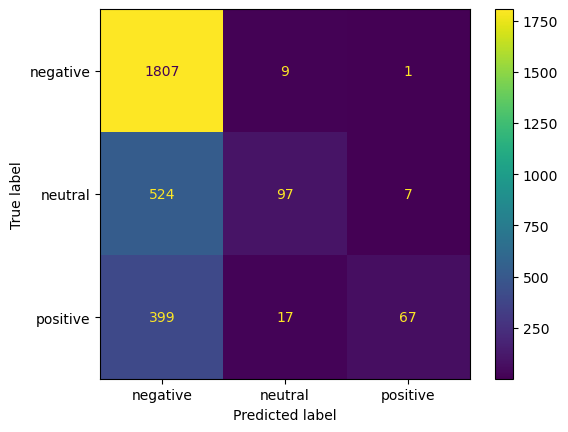

In [30]:
report(nb)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.81      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



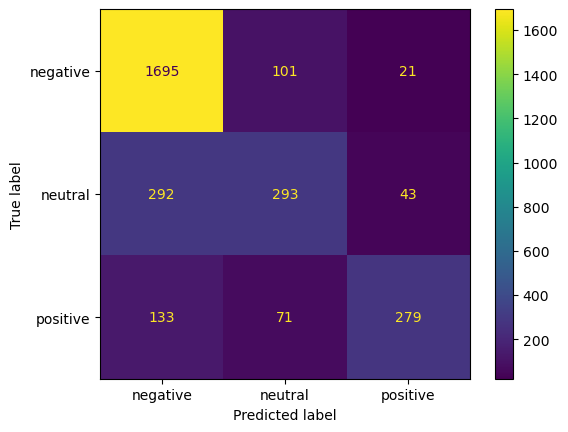

In [31]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



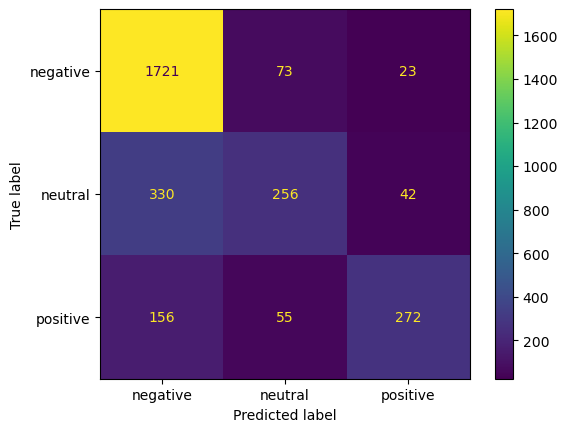

In [32]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



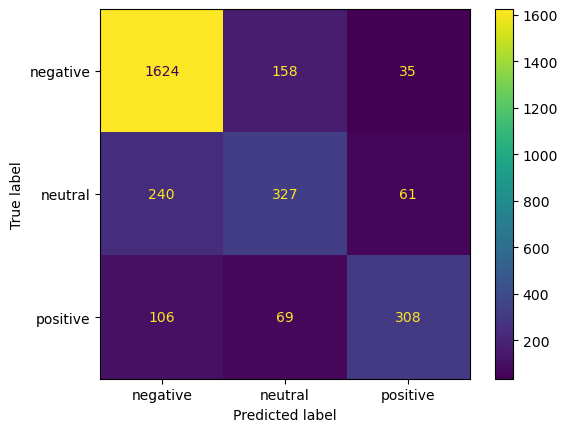

In [33]:
report(l_svc)

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
pipe=Pipeline([('tfid',TfidfVectorizer()),
               ('svc',LinearSVC()),
               ])

In [36]:
pipe.fit(X,y)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('svc', LinearSVC())])

In [37]:
X

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [38]:
pipe.predict(['Good flight'])

array(['positive'], dtype=object)

In [43]:
pipe.predict([' disgusting Flight'])

array(['negative'], dtype=object)

In [44]:
pipe.predict(['ok flight'])

array(['neutral'], dtype=object)